# Time Series Analysis - Introduction to Forecasting Algorithms



# The Data

We are provided with a Time Series problem involving prediction of number of commuters of JetRail, a new high speed rail service by Unicorn Investors. We are provided with 2 years of data(Aug 2012-Sept 2014) and using this data we have to forecast the number of commuters for next 7 months.

# Import Packages

In addition to Statsmodels, we will need to import additional packages, including Numpy, Scipy, Pandas, and Matplotlib.

Also, from Statsmodels we will need to import qqplot.

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [3]:
df= pd.read_csv("Jet_Rail_Data.csv")
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


### Preparing the Data

1. Subsetting the dataset from (August 2012 – Dec 2013)
2. Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
3. Aggregating the dataset at daily basis.

In [5]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
df = pd.read_csv('Jet_Rail_Data.csv', nrows = 11856)
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:10392] 
test=df[10392:]

In [6]:
train.tail()

,ID,Datetime,Count
10387,10387,31-10-2013 19:00,184
10388,10388,31-10-2013 20:00,190
10389,10389,31-10-2013 21:00,166
10390,10390,31-10-2013 22:00,150
10391,10391,31-10-2013 23:00,162


In [7]:
test.head()

,ID,Datetime,Count
10392,10392,01-11-2013 00:00,170
10393,10393,01-11-2013 01:00,156
10394,10394,01-11-2013 02:00,90
10395,10395,01-11-2013 03:00,88
10396,10396,01-11-2013 04:00,54


In [8]:
test.tail()

,ID,Datetime,Count
11851,11851,31-12-2013 19:00,286
11852,11852,31-12-2013 20:00,256
11853,11853,31-12-2013 21:00,228
11854,11854,31-12-2013 22:00,216
11855,11855,31-12-2013 23:00,246


In [9]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df1 = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:
df.head(24)

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
2012-08-25 05:00:00,5,25-08-2012 05:00,2
2012-08-25 06:00:00,6,25-08-2012 06:00,2
2012-08-25 07:00:00,7,25-08-2012 07:00,2
2012-08-25 08:00:00,8,25-08-2012 08:00,6


In [10]:
train.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [13]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp 
df_new = df.resample('D').sum()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train_new = train.resample('D').sum() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test_new = test.resample('D').sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [14]:
df.head(24)

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2
2012-08-25 05:00:00,5,25-08-2012 05:00,2
2012-08-25 06:00:00,6,25-08-2012 06:00,2
2012-08-25 07:00:00,7,25-08-2012 07:00,2
2012-08-25 08:00:00,8,25-08-2012 08:00,6


In [15]:
df_new.head()

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60


In [23]:
train_new.head()

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60


In [24]:
test_new.head()

,ID,Count
Datetime,,
2013-11-01,249684,3878
2013-11-02,250260,2474
2013-11-03,250836,1844
2013-11-04,251412,3754
2013-11-05,251988,4074


# Examine the Data

Now we take a look at the data.

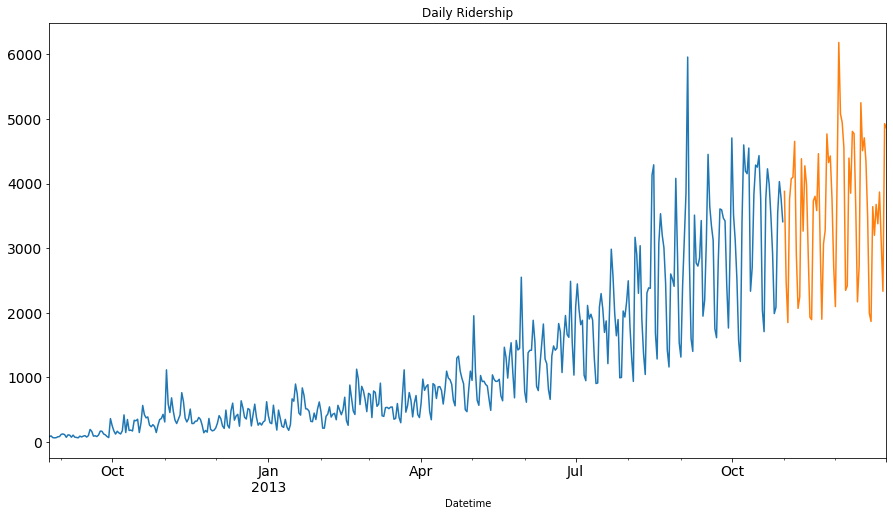

In [16]:
#Plotting data
train_new.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test_new.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

## <center> Naive Approach </center>

In [18]:
y_hat['naive']

Datetime
2013-11-01    3408
2013-11-02    3408
2013-11-03    3408
2013-11-04    3408
2013-11-05    3408
2013-11-06    3408
2013-11-07    3408
2013-11-08    3408
2013-11-09    3408
2013-11-10    3408
2013-11-11    3408
2013-11-12    3408
2013-11-13    3408
2013-11-14    3408
2013-11-15    3408
2013-11-16    3408
2013-11-17    3408
2013-11-18    3408
2013-11-19    3408
2013-11-20    3408
2013-11-21    3408
2013-11-22    3408
2013-11-23    3408
2013-11-24    3408
2013-11-25    3408
2013-11-26    3408
2013-11-27    3408
2013-11-28    3408
2013-11-29    3408
2013-11-30    3408
              ... 
2013-12-02    3408
2013-12-03    3408
2013-12-04    3408
2013-12-05    3408
2013-12-06    3408
2013-12-07    3408
2013-12-08    3408
2013-12-09    3408
2013-12-10    3408
2013-12-11    3408
2013-12-12    3408
2013-12-13    3408
2013-12-14    3408
2013-12-15    3408
2013-12-16    3408
2013-12-17    3408
2013-12-18    3408
2013-12-19    3408
2013-12-20    3408
2013-12-21    3408
2013-12-22    3408
201

In [19]:
dd

array([  76,   88,   62,   58,   60,   74,   78,  112,  118,  108,   66,
        104,  100,   68,  100,   68,   64,   58,   84,   72,   84,   92,
         70,   92,  188,  158,   84,   90,   78,  102,  162,  160,  118,
        104,   78,   62,  356,  248,  166,  116,  160,  134,  118,  168,
        414,  140,  342,  172,  178,  164,  330,  322,  346,  140,  292,
        560,  416,  368,  382,  256,  230,  262,  232,  140,  256,  342,
        358,  422,  304, 1112,  584,  450,  678,  474,  334,  280,  348,
        412,  758,  620,  366,  304,  356,  504,  280,  280,  316,  318,
        374,  344,  256,  136,  172,  146,  358,  190,  166,  176,  210,
        284,  402,  356,  244,  204,  488,  254,  210,  478,  596,  332,
        396,  422,  238,  632,  526,  376,  350,  512,  494,  242,  418,
        580,  376,  254,  290,  256,  304,  324,  618,  402,  292,  278,
        564,  352,  178,  488,  362,  238,  220,  344,  222,  174,  262,
        662,  626,  892,  742,  444,  410,  832,  7

In [20]:
len(dd)

433

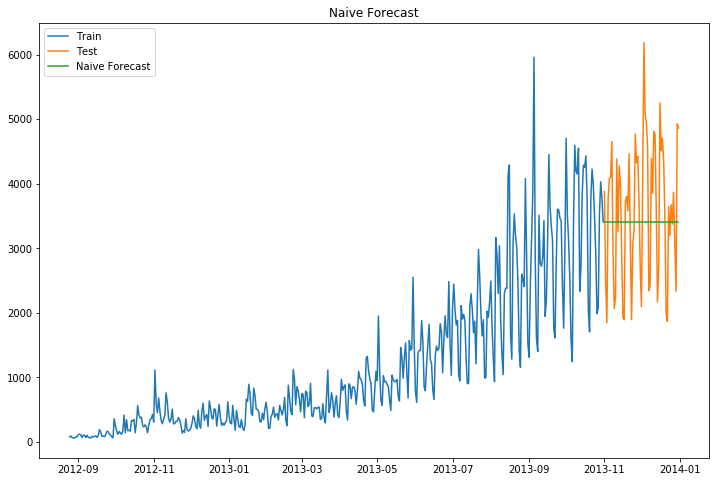

In [21]:
dd= np.asarray(train_new.Count)
y_hat = test_new.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train_new.index, train_new['Count'], label='Train')
plt.plot(test_new.index,test_new['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_new.Count, y_hat.naive))
print(rms)

1053.9937474540022


## <center> Simple Average </center>

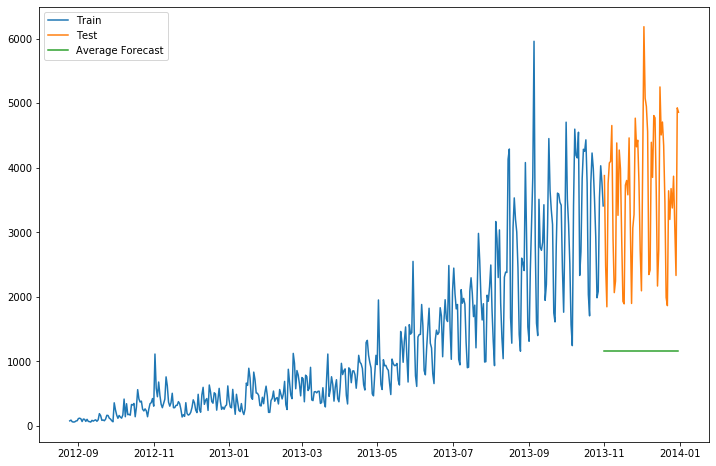

In [25]:
y_hat_avg = test_new.copy()
y_hat_avg['avg_forecast'] = train_new['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [26]:
rms = sqrt(mean_squared_error(test_new.Count, y_hat_avg.avg_forecast))
print(rms)

2637.2463664998872


## <center> Moving Average </center>

In [33]:
train_new.head(20)

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60
2012-08-30,3156,74
2012-08-31,3732,78
2012-09-01,4308,112
2012-09-02,4884,118


In [35]:
train_new.rolling(2).mean()

,ID,Count
Datetime,,
2012-08-25,NaN,NaN
2012-08-26,564.0,82.0
2012-08-27,1140.0,75.0
2012-08-28,1716.0,60.0
2012-08-29,2292.0,59.0
2012-08-30,2868.0,67.0
2012-08-31,3444.0,76.0
2012-09-01,4020.0,95.0
2012-09-02,4596.0,115.0


In [32]:
train_new.tail()

,ID,Count
Datetime,,
2013-10-27,246804,2082
2013-10-28,247380,3536
2013-10-29,247956,4030
2013-10-30,248532,3774
2013-10-31,249108,3408


In [31]:
y_hat_avg.head()

,ID,Count,moving_avg_forecast
Datetime,,,
2013-11-01,249684,3878,3313.466667
2013-11-02,250260,2474,3313.466667
2013-11-03,250836,1844,3313.466667
2013-11-04,251412,3754,3313.466667
2013-11-05,251988,4074,3313.466667


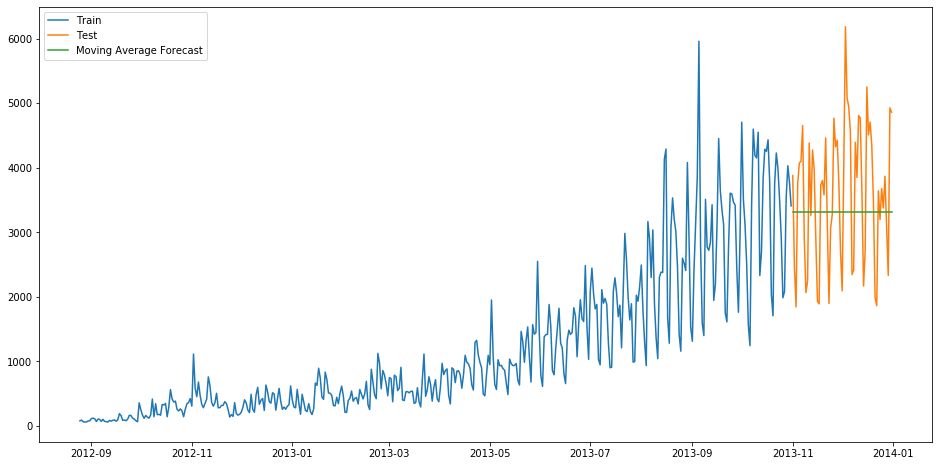

In [36]:
y_hat_avg = test_new.copy()
y_hat_avg['moving_avg_forecast'] = train_new['Count'].rolling(30).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [37]:
train_new.count()

ID       433
Count    433
dtype: int64

In [38]:
train_new['Count'][403:].mean()

3313.4666666666667

In [39]:
y_hat_avg.head()

,ID,Count,moving_avg_forecast
Datetime,,,
2013-11-01,249684,3878,3313.466667
2013-11-02,250260,2474,3313.466667
2013-11-03,250836,1844,3313.466667
2013-11-04,251412,3754,3313.466667
2013-11-05,251988,4074,3313.466667


In [40]:
rms = sqrt(mean_squared_error(test_new.Count, y_hat_avg.moving_avg_forecast))
print(rms)

1073.820426555651


Above Prediction called the point predictions

## <center> Simple Exponential Smoothing </center>

In above approach , we are giving the same weitage to each value. 
Whereas exponential smoothing, we decrese the weight exponential.

In [52]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [53]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

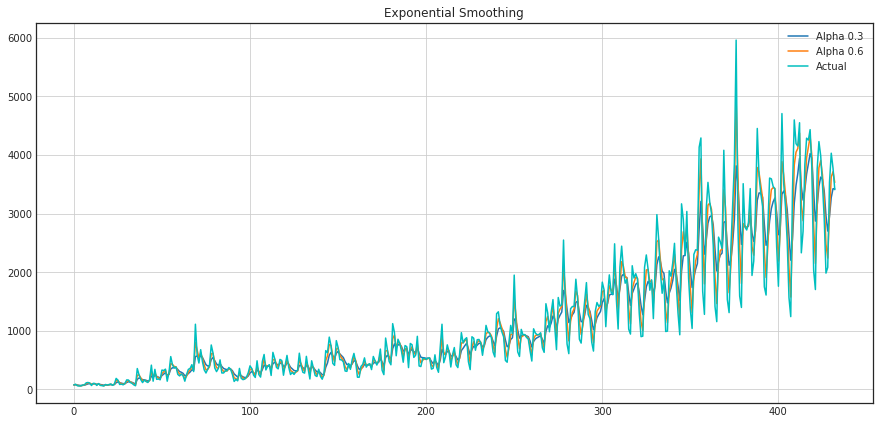

In [54]:
plotExponentialSmoothing(train_new['Count'], [0.3, 0.6])

In [55]:
train_new['Exp_Pred']=exponential_smoothing(train_new['Count'],0.6)

In [56]:
train_new.tail()

,ID,Count,Exp_Pred
Datetime,,,
2013-10-27,246804,2082,2240.412892
2013-10-28,247380,3536,3017.765157
2013-10-29,247956,4030,3625.106063
2013-10-30,248532,3774,3714.442425
2013-10-31,249108,3408,3530.576970


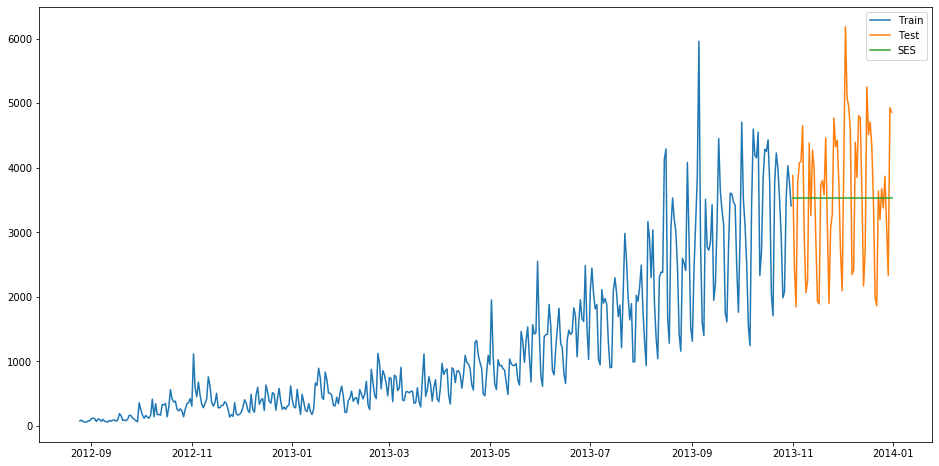

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test_new.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_new['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test_new))
plt.figure(figsize=(16,8))
plt.plot(train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [82]:
y_hat_avg.head()

,ID,Count,SES
Datetime,,,
2013-11-01,249684,3878,3530.57697
2013-11-02,250260,2474,3530.57697
2013-11-03,250836,1844,3530.57697
2013-11-04,251412,3754,3530.57697
2013-11-05,251988,4074,3530.57697


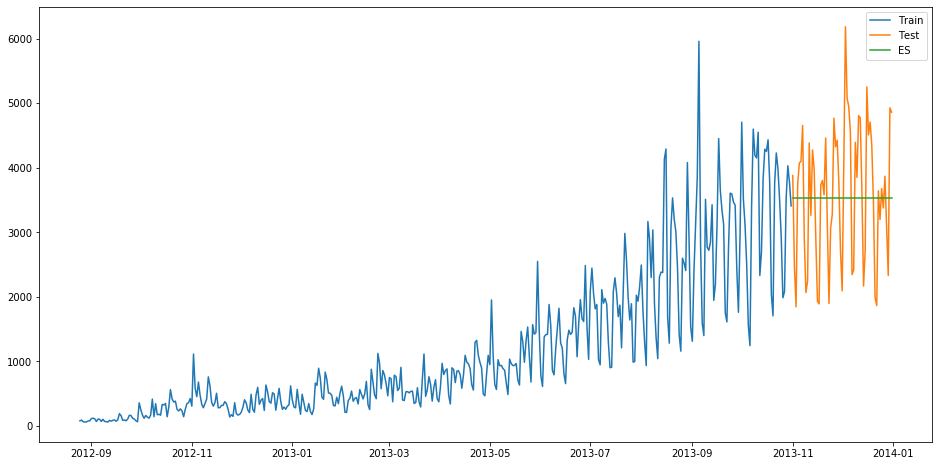

In [61]:
from statsmodels.tsa.api import ExponentialSmoothing
#y_hat_avg = test_new.copy()
fit2 = ExponentialSmoothing(np.asarray(train_new['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['ES'] = fit2.forecast(len(test_new))
plt.figure(figsize=(16,8))
plt.plot(train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['ES'], label='ES')
plt.legend(loc='best')
plt.show()

In [62]:
y_hat_avg.head()

,ID,Count,ES
Datetime,,,
2013-11-01,249684,3878,3530.57697
2013-11-02,250260,2474,3530.57697
2013-11-03,250836,1844,3530.57697
2013-11-04,251412,3754,3530.57697
2013-11-05,251988,4074,3530.57697


In [ ]:
from statsmodels.tsa.api import Holt
y_hat_avg = test_new.copy()
fit2 = Holt(np.asarray(train_new['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['HT'] = fit2.forecast(len(test_new))
plt.figure(figsize=(16,8))
plt.plot(train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

## <center> ARIMA Model </center>
ARIMA models are, in theory, the most general class of models for forecasting a time series, which can be made to be “stationary” by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). A random variable that is a time series is stationary if its statistical properties are all constant over time. A stationary series has no trend, its variations around its mean have a constant amplitude, and it wiggles in a consistent fashion, i.e., its short-term random time patterns always look the same in a statistical sense. The latter condition means that its autocorrelations (correlations with its prior deviations from the mean) remain constant over time, or equivalently, that its power spectrum remains constant over time. A random variable of this form can be viewed (as usual) as a combination of signal and noise, and the signal (if one is apparent) could be a pattern of fast or slow mean reversion, or sinusoidal oscillation, or rapid alternation in sign, and it could also have a seasonal component. An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

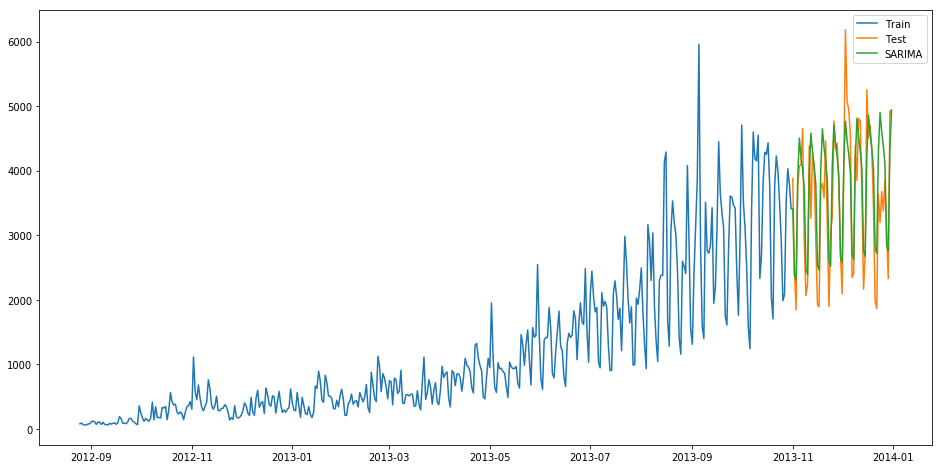

In [144]:
y_hat_avg = test_new.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_new.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train_new['Count'], label='Train')
plt.plot(test_new['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [145]:
rms = sqrt(mean_squared_error(test_new.Count, y_hat_avg.SARIMA))
print(rms)

616.5679557357199


## The Data

The data we will use is annual sunspot data from 1700 – 2008 recording the number of sunspots per year. The file sunspots.csv and can be downloaded from the line below.

In [156]:
dta= pd.read_csv("sunspots.csv")

In [157]:
dta.head()

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [148]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



## Preparing the Data

Next we need to do a little dataset preparation. Here, an annual date series must be date-times at the end of the year.

In [158]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

## Examine the Data

Now we take a look at the data.

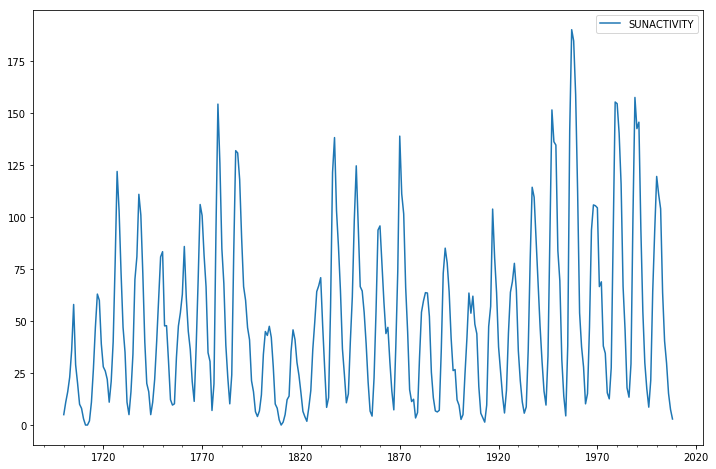

In [150]:
# show plots in the notebook
%matplotlib inline
dta.plot(figsize=(12,8));

In [172]:
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [173]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(dta.SUNACTIVITY, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


# Auto-correlations

Before we decide which model to use, we need to look at auto-correlations.

#### Autocorrelation correlogram. 
Seasonal patterns of time series can be examined via correlograms, which display graphically and numerically the autocorrelation function (ACF). Auto-correlation in pandas plotting and statsmodels graphics standardize the data before computing the auto-correlation. These libraries subtract the mean and divide by the standard deviation of the data.

When using standardization, they make an assumption that your data has been generated with a Gaussian law (with a certain mean and standard deviation). This may not be the case in reality.

Correlation is sensitive. Both (matplotlib and pandas plotting) of these functions have their drawbacks. The figure generated by the following code using matplotlib will be identical to figure generated by pandas plotting or statsmodels graphics.

#### Partial autocorrelations. 
Another useful method to examine serial dependencies is to examine the partial autocorrelation function (PACF) – an extension of autocorrelation, where the dependence on the intermediate elements (those within the lag) is removed.

Once we determine the nature of the auto-correlations we use the following rules of thumb.

   * Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
   * Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
   * Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
   * Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
   * Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.

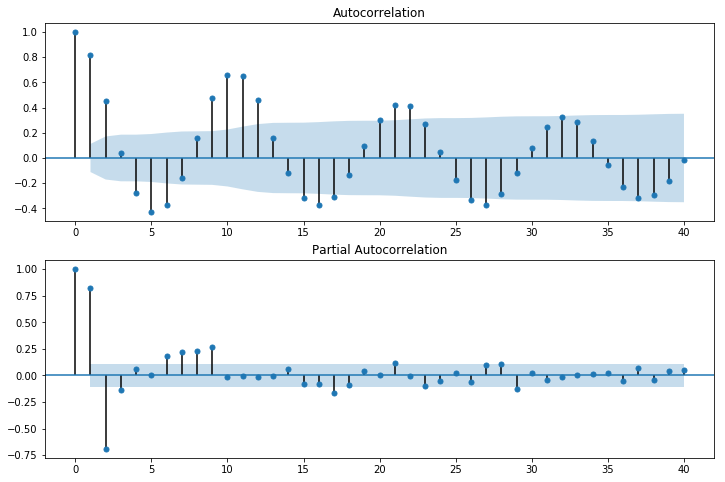

In [152]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

Results of Dickey-Fuller Test:
Test Statistic                   0.306586
p-value                          0.977645
#Lags Used                      16.000000
Number of Observations Used    416.000000
Critical Value (1%)             -3.446168
Critical Value (5%)             -2.868513
Critical Value (10%)            -2.570484
dtype: float64


# Times Series Modeling
We will only explore two methods here. An ARMA model is classified as ARMA(p,q), with no differenceing terms. ARMA models can be described by a series of equations. The equations are somewhat simpler if the time series is first reduced to zero-mean by subtracting the sample mean. Therefore, we will work with the mean-adjusted series

    yt = Yt – Y̅, t = 1, …N

where Yt is the original time series, Y̅ is its sample mean, and yt is the mean-adjusted series. One subset of ARMA models are the so-called autoregressive, or AR models. An AR model expresses a time series as a linear function of its past values. The order of the AR model tells how many lagged past values are included. The simplest AR model is the first-order autoregressive, or AR(1), model

    yt + a1 yt-1 = et

where yt is the mean-adjusted series in year t, yt-1 is the series in the previous year, at is the lag-1 autoregressive coefficient, and et is the noise. The noise also goes by various other names: the error, the random-shock, and the residual. The residuals et are assumed to be random in time (not autocorrelated), and normally distributed. Be rewriting the equation for the AR(1) model as

    yt = a1 yt-1 + et

We see that the AR(1) model has the form of a regression model in which yt is regressed on its previous value. In this form, at is analogous to the negative of the regression coefficient, and et to the regression residuals. The name autoregressive refers to the regression on self (auto).

A nonseasonal ARIMA model is classified as an ARIMA(p,d,q) model, where:

   * p is the number of autoregressive terms,
   * d is the number of nonseasonal differences needed for stationarity, and
   * q is the number of lagged forecast errors in the prediction equation.
   
The forecasting equation is constructed as follows. First, let y denote the dth difference of Y, which means:

    If d=0: yt = Yt

    If d=1: yt = Yt – Yt-1

    If d=2: yt = (Yt – Yt-1) – (Yt-1 – Yt-2) = Yt – 2Yt-1 + Yt-2

Note that the second difference of Y (the d=2 case) is not the difference from two periods ago. Rather, it is the first-difference-of-the-first difference, which is the discrete analog of a second derivative, i.e., the local acceleration of the series rather than its local trend.


# Modeling the Data

In [177]:
arma_mod20 = sm.tsa.ARMA(dta['SUNACTIVITY'], (2,0)).fit()
print(arma_mod20.params)

/Users/rahulaggarwal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
/Users/rahulaggarwal/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/rahulaggarwal/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/ra

const                49.659554
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


We now calculate the Akaike Information Criterion (AIC), Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes (AIC, BIC, HQIC).

In [15]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6363380637513 2637.56970317 2628.60672591


Does our model obey the theory? We will use the Durbin-Watson test for autocorrelation. The Durbin-Watson statistic ranges in value from 0 to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; a value toward 4 indicates negative autocorrelation.

In [16]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.1458268282014701

 The Durbin-Watson test shows no autocorrelation.


## Plotting the Data

Next we plot and study the data it represents.

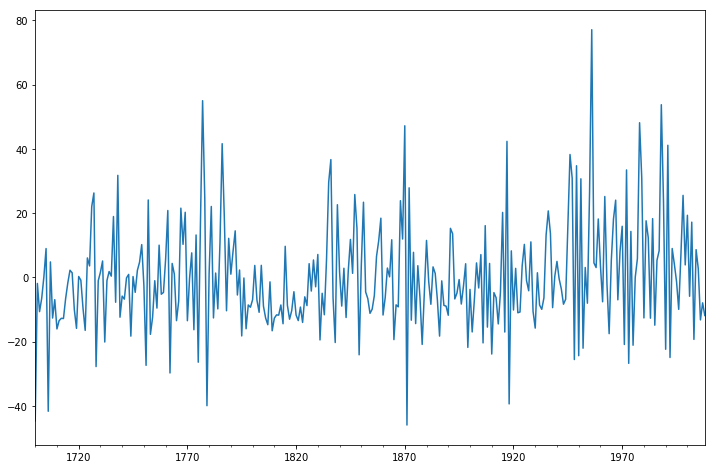

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

## Analyzing the Residuals

In the following steps, we calculate the residuals, tests the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot.

In [21]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)


NormaltestResult(statistic=41.736018916111405, pvalue=8.652440949981332e-10)

## Model Autocorrelation

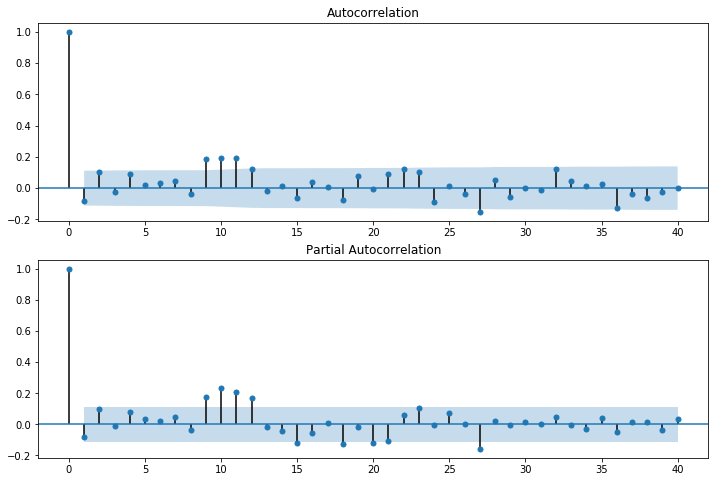

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

## Predictions

Next, we compute the predictions and analyze their fit against actual values.

In [178]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    164.966862
1991-12-31    135.687644
1992-12-31     89.897721
1993-12-31     46.380527
1994-12-31     17.392712
1995-12-31      7.045328
1996-12-31     12.615854
1997-12-31     27.487447
1998-12-31     44.333012
1999-12-31     57.519242
2000-12-31     64.257378
2001-12-31     64.548148
2002-12-31     60.312821
2003-12-31     54.222725
2004-12-31     48.669821
2005-12-31     45.141108
2006-12-31     44.057453
2007-12-31     44.980232
2008-12-31     47.009673
2009-12-31     49.196529
2010-12-31     50.840277
2011-12-31     51.620359
2012-12-31     51.573348
Freq: A-DEC, dtype: float64


/Users/rahulaggarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


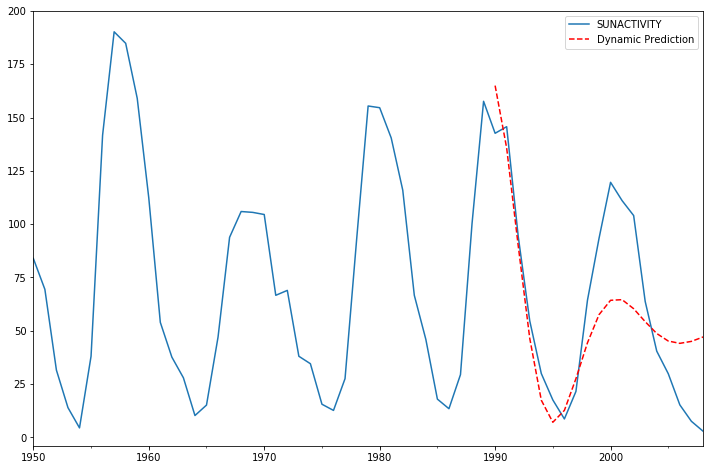

In [179]:
ax = dta.ix['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

The fit looks good up to about 1998 and underfit the data afterwards.

## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [28]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [29]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  4.73040833622
MAE =  0.134689547232


For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit.